# 신경망의 학습

### 크로스 엔트로피 그래프

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0, 1, 0.01)
y = -np.log(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('log_x')
plt.show()

## Repeat 노드

In [10]:
import numpy as np

D, N = 8, 7
x = np.random.rand(1, D)
print(x.shape)
y = np.repeat(x, N, axis=0)
print(y.shape)
dy = np.random.rand(N, D)
print(dy.shape)
dx = np.sum(dy, axis=0, keepdims=True)
print(dx.shape)
dx

(1, 8)
(7, 8)
(7, 8)
(1, 8)


array([[3.06774262, 3.15514071, 3.11582446, 1.85884362, 3.66944001,
        3.05629209, 3.72772768, 4.14941291]])

In [16]:
import numpy as np

D, N = 8, 7
x = np.random.rand(D)
print(x.shape)
y = np.repeat(x.reshape(1,D), N, axis=0)
print(y.shape)
dy = np.random.rand(N, D)
print(dy.shape)
dx = np.sum(dy, axis=0)
print(dx.shape)
dx

(8,)
(7, 8)
(7, 8)
(8,)


array([3.91864025, 2.88657376, 4.01159034, 3.68957942, 4.56570091,
       3.14012975, 3.74120535, 3.12628387])

## Sum 노드

In [20]:
import numpy as np

D, N = 8, 7
x = np.random.rand(N, D)
y = np.sum(x, axis=0, keepdims=True)
print(y.shape)
dy = np.random.rand(1, D)
print(dy.shape)
dx = np.repeat(dy, N, axis=0)
print(dx.shape)
dx

(1, 8)
(1, 8)
(7, 8)


array([[0.00591252, 0.54201338, 0.17020228, 0.84000105, 0.77548366,
        0.82957107, 0.59111627, 0.11162397],
       [0.00591252, 0.54201338, 0.17020228, 0.84000105, 0.77548366,
        0.82957107, 0.59111627, 0.11162397],
       [0.00591252, 0.54201338, 0.17020228, 0.84000105, 0.77548366,
        0.82957107, 0.59111627, 0.11162397],
       [0.00591252, 0.54201338, 0.17020228, 0.84000105, 0.77548366,
        0.82957107, 0.59111627, 0.11162397],
       [0.00591252, 0.54201338, 0.17020228, 0.84000105, 0.77548366,
        0.82957107, 0.59111627, 0.11162397],
       [0.00591252, 0.54201338, 0.17020228, 0.84000105, 0.77548366,
        0.82957107, 0.59111627, 0.11162397],
       [0.00591252, 0.54201338, 0.17020228, 0.84000105, 0.77548366,
        0.82957107, 0.59111627, 0.11162397]])

In [26]:
import numpy as np

D, N = 8, 7
x = np.random.rand(N, D)
print(x.shape)
y = np.sum(x, axis=0)
print(y.shape)
dy = np.random.rand(D)
print(dy.shape)
dx = np.repeat(dy.reshape(1,D), N, axis=0)
print(dx.shape)
dx

(7, 8)
(8,)
(8,)
(7, 8)


array([[0.52579277, 0.51289234, 0.30521251, 0.44658822, 0.11632769,
        0.34858617, 0.61048278, 0.75630554],
       [0.52579277, 0.51289234, 0.30521251, 0.44658822, 0.11632769,
        0.34858617, 0.61048278, 0.75630554],
       [0.52579277, 0.51289234, 0.30521251, 0.44658822, 0.11632769,
        0.34858617, 0.61048278, 0.75630554],
       [0.52579277, 0.51289234, 0.30521251, 0.44658822, 0.11632769,
        0.34858617, 0.61048278, 0.75630554],
       [0.52579277, 0.51289234, 0.30521251, 0.44658822, 0.11632769,
        0.34858617, 0.61048278, 0.75630554],
       [0.52579277, 0.51289234, 0.30521251, 0.44658822, 0.11632769,
        0.34858617, 0.61048278, 0.75630554],
       [0.52579277, 0.51289234, 0.30521251, 0.44658822, 0.11632769,
        0.34858617, 0.61048278, 0.75630554]])

## MatMul 

In [27]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None

    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out

    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

In [33]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(hex(id(a)))
print(hex(id(b)))
a = b
print(a)
print(hex(id(a)))
print(hex(id(b)))
a[1]=10
print(id(a) == id(b))
print(a)
print(b)

0x1c07f63de90
0x1c07f65dd50
[4 5 6]
0x1c07f65dd50
0x1c07f65dd50
True
[ 4 10  6]
[ 4 10  6]


In [38]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
print(hex(id(a)))
print(hex(id(b)))
a[...] = b
print(a)
print(hex(id(a)))
print(hex(id(b)))
a[1]=10
print(id(a) == id(b))
print(a)
print(b)

0x1c07f6534e0
0x1c07f653da0
[4 5 6]
0x1c07f6534e0
0x1c07f653da0
False
[ 4 10  6]
[4 5 6]


## 시그모이드 계층

In [39]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None

    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

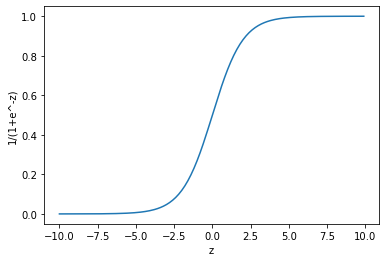

In [40]:
import matplotlib.pyplot as plt
x = np.arange(-10., 10., 0.1)
sigmoid = Sigmoid()
out = sigmoid.forward(x)
plt.plot(x, out)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show()

In [42]:
import matplotlib.pyplot as plt

dout = sigmoid.backward(1)
plt.plot(x, dout)
plt.ylim(0,1)
plt.xlabel('z')
plt.ylabel('y*(1-y)')
plt.show()

## Affine 계층

In [44]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None

    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out

    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)

        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx

In [50]:
X = np.random.randn(10,2)
W = np.random.randn(2,4)
b = np.random.randn(4)
affine = Affine(W,b)
out = affine.forward(X)
print(out.shape)
dout = np.random.randn(10,4)
dx = affine.backward(dout)
print(affine.grads[0].shape)
print(affine.grads[1].shape)
print(dx.shape)

(10, 4)
(2, 4)
(4,)
(10, 2)


## Softmax with Loss 계층

In [56]:
def softmax(x):
    if x.ndim == 2:
        x = x - x.max(axis=1, keepdims=True)
        x = np.exp(x)
        x /= x.sum(axis=1, keepdims=True)
    elif x.ndim == 1:
        x = x - np.max(x)
        x = np.exp(x) / np.sum(np.exp(x))

    return x


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 정답 데이터가 원핫 벡터일 경우 정답 레이블 인덱스로 변환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]

    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [64]:
class SoftmaxWithLoss:
    def __init__(self):
        self.params, self.grads = [], []
        self.y = None  # softmax의 출력
        self.t = None  # 정답 레이블

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)

        # 정답 레이블이 원핫 벡터일 경우 정답의 인덱스로 변환
        if self.t.size == self.y.size:
            self.t = self.t.argmax(axis=1)

        loss = cross_entropy_error(self.y, self.t)
        return loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]

        dx = self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx *= dout
        dx = dx / batch_size

        return dx

In [65]:
x = np.array([[0.1,-0.1,0]])
t = np.array([[0, 1, 0]])
swl = SoftmaxWithLoss()
loss = swl.forward(x,t)
print(loss)
print(swl.y)
dx = swl.backward(x,t)

1.2019425155719317
[[0.3671654  0.30060961 0.33222499]]


## 가중치 갱신

In [ ]:
class SGD:
    '''
    확률적 경사하강법(Stochastic Gradient Descent)
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]